In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

#### -merge the 12 months in one csv file

In [3]:
files = [file for file in os.listdir(r'G:\My Drive\projects\data analysis\sales analysis\SalesAnalysis\Sales_Data')]
all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv(r"G:\My Drive\projects\data analysis\sales analysis\SalesAnalysis\Sales_Data\\"+file)
    all_months_data=pd.concat([all_months_data,df])
all_months_data.to_csv("col_date.csv",index= False)
    

## show data

In [5]:
all_data = pd.read_csv("col_date.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [6]:
all_data.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


# - clean data frame

#### Drop row of NAN

In [9]:
nan_value= all_data[all_data.isna().any(axis=1)]
all_data = all_data.dropna(how='all')
nan_value.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


#### find 'Or'and delete it

In [11]:
all_data=all_data[all_data['Order Date'].str[0:2] != 'Or']

#### add month column

In [13]:
all_data['Month']=all_data['Order Date'].str[0:2]
all_data['Month']=all_data['Month'].astype('int32')
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### add sales column

In [15]:
all_data['Quantity Ordered']=pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each']=pd.to_numeric(all_data['Price Each'])
all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']
all_data['Sales']=pd.to_numeric(all_data['Sales'])
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Q1 : what is the best month for sales? and how much was earned in this month?

In [17]:
results = all_data.groupby('Month').sum('Sales')

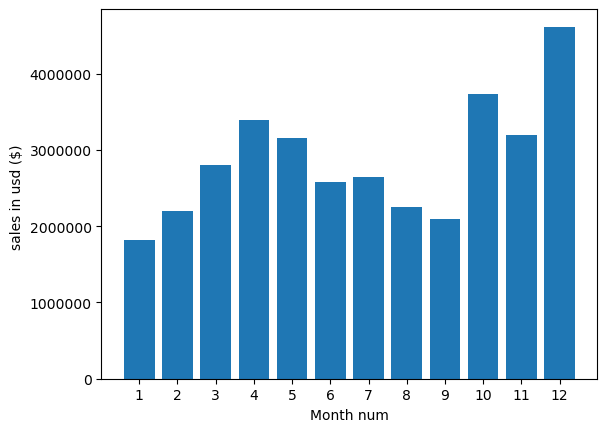

In [18]:
months = range(1,13)
plt.bar(months, results['Sales'])
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(months)
plt.xlabel('Month num')
plt.ylabel('sales in usd ($) ')
plt.show()

#### Q2 : what city had highest sales?

In [20]:
all_data['City']=all_data['Purchase Address'].str.extract(r',(.*?),')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [21]:
Cities = all_data.groupby('City')[['Sales']].sum()

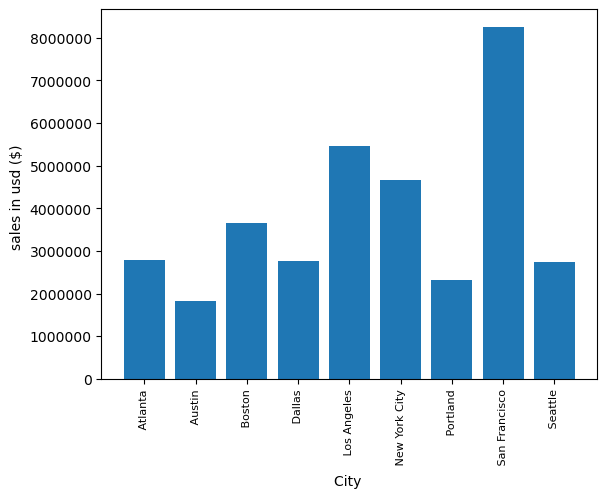

In [22]:
ct = [ct for ct, df in all_data.groupby('City')]
plt.bar(ct, Cities['Sales'])
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(ct, rotation='vertical',size = 8)
plt.xlabel('City ')
plt.ylabel('sales in usd ($) ')
plt.show()

#### Q3 : what time do you recommend to add advertisment?

In [24]:
all_data['Order Date']= pd.to_datetime(all_data['Order Date'])
all_data['hour']=all_data['Order Date'].dt.hour
all_data['minute']=all_data['Order Date'].dt.minute
all_data.head()

C:\Users\mylap\AppData\Local\Temp\ipykernel_13472\3206861864.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date']= pd.to_datetime(all_data['Order Date'])


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,hour,minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,27


In [25]:
Or_by_hour= all_data.groupby('hour')[['Quantity Ordered']].sum()

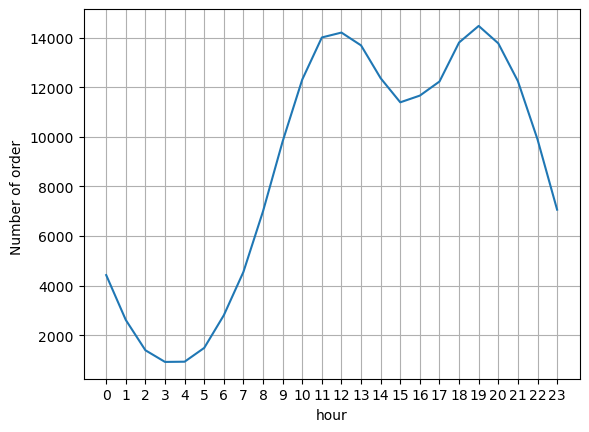

In [26]:
hours = [hour for hour, df in all_data.groupby('hour')]
plt.plot(hours, Or_by_hour['Quantity Ordered'])
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(hours)
plt.grid()
plt.xlabel('hour')
plt.ylabel('Number of order ')
plt.show()
# my recommendation is around 11am(11) or 6pm(18)

#### Q4 : what products are most often sold together?

In [28]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Group']=df.groupby('Order ID')[['Product']].transform(lambda x:','.join(x))
df = df[['Order ID','Group']].drop_duplicates()
df.head()


C:\Users\mylap\AppData\Local\Temp\ipykernel_13472\276659945.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Group']=df.groupby('Order ID')[['Product']].transform(lambda x:','.join(x))


,Order ID,Group
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [29]:
from itertools import combinations
from collections import Counter

count = Counter()
for row in df['Group']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

df_results = pd.DataFrame(count.most_common(10), columns=['products', 'Count'])
df_results.index = range(1, 11)
print(df_results)

                                        products  Count
1             (iPhone, Lightning Charging Cable)   1005
2           (Google Phone, USB-C Charging Cable)    987
3                     (iPhone, Wired Headphones)    447
4               (Google Phone, Wired Headphones)    414
5        (Vareebadd Phone, USB-C Charging Cable)    361
6             (iPhone, Apple Airpods Headphones)    360
7     (Google Phone, Bose SoundSport Headphones)    220
8       (USB-C Charging Cable, Wired Headphones)    160
9            (Vareebadd Phone, Wired Headphones)    143
10  (Lightning Charging Cable, Wired Headphones)     92


#### Q4: what is the most product sold? and why ?

In [31]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,hour,minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,27


In [32]:
product_group= all_data.groupby('Product')[['Quantity Ordered']].sum()
product_group

,Quantity Ordered
Product,
20in Monitor,4129
27in 4K Gaming Monitor,6244
27in FHD Monitor,7550
34in Ultrawide Monitor,6199
AA Batteries (4-pack),27635
AAA Batteries (4-pack),31017
Apple Airpods Headphones,15661
Bose SoundSport Headphones,13457
Flatscreen TV,4819


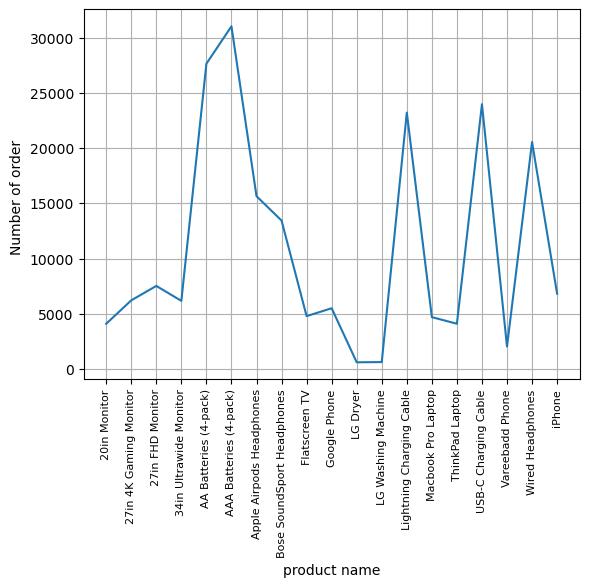

In [33]:
products = [product for product, df in all_data.groupby('Product')]
plt.plot(products, product_group['Quantity Ordered'])
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(products,rotation='vertical',size = 8)
plt.grid()
plt.xlabel('product name')
plt.ylabel('Number of order ')
plt.show()

In [34]:
prices=all_data.groupby('Product')[['Price Each']].mean()

C:\Users\mylap\AppData\Local\Temp\ipykernel_13472\3865485644.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products, rotation='vertical',size=8)


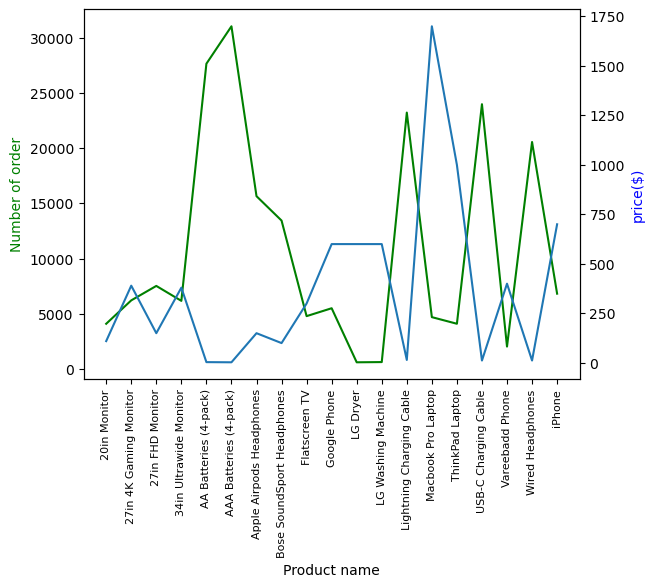

In [35]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(products,product_group['Quantity Ordered'],color='g')
ax2.plot(products,prices['Price Each'])

ax1.set_xlabel("Product name")
ax1.set_ylabel("Number of order",color='g')
ax1.tick_params(axis="y")
ax2.set_ylabel("price($)",color='b')
ax2.tick_params(axis="y")
ax1.set_xticklabels(products, rotation='vertical',size=8)

plt.show()

## AAA Batteries(4-pack) is the best,According to the data, the most likely reason is price